# Clustering with K-Means

## Setup

In [1]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer

# Sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
CMAP = sns.diverging_palette(230, 20, n=24)

## Data Loading

In [3]:
x, y, c = make_blobs(1000, cluster_std=0.8, centers=5, n_features=2, return_centers=True)


In [4]:
df_blobs = pl.DataFrame({"x1": x[:, 0], "x2": x[:, 1], "y": y})

df_centers = pl.DataFrame({"x1": c[:, 0], "x2": c[:, 1]})

In [5]:
df_blobs.head()

x1,x2,y
f64,f64,i64
0.755405,-5.366092,1
4.488627,-3.11932,3
2.44971,-4.339679,0
5.193772,-4.231174,3
-5.459063,-3.527147,2


## Data Visualization

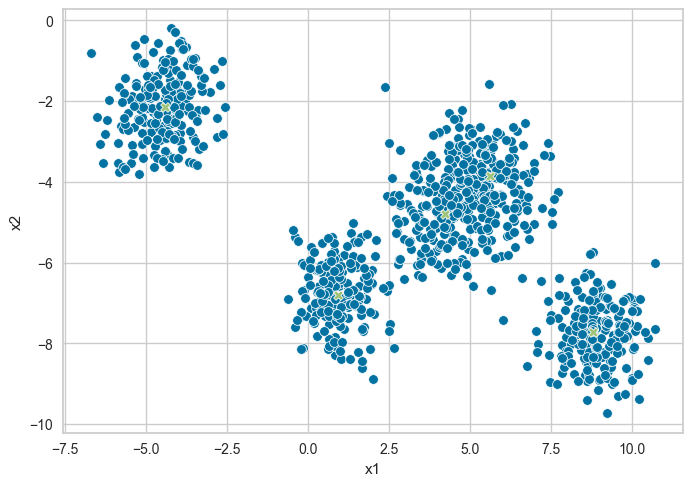

In [6]:
sns.scatterplot(data=df_blobs, x="x1", y="x2")
sns.scatterplot(data=df_centers, x="x1", y="x2", marker="X")
plt.show()

## Using K-Means

In [7]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(x)
df_blobs = df_blobs.with_columns(pl.Series(name="cluster", values=clusters))

kmeans_centers = kmeans.cluster_centers_
df_k_means_centers = pl.DataFrame(
    {
        "x1": kmeans_centers[:, 0],
        "x2": kmeans_centers[:, 1],
    }
)

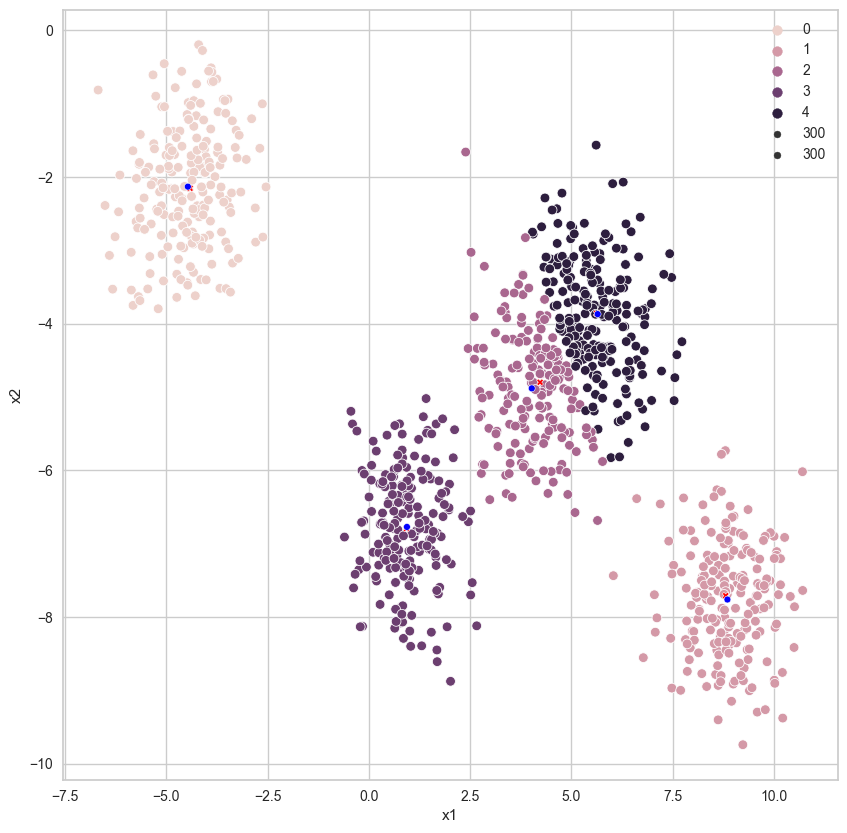

In [8]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_blobs, x="x1", y="x2", hue="cluster")
sns.scatterplot(data=df_centers, x="x1", y="x2", marker="X", size=300, color="red")
sns.scatterplot(
    data=df_k_means_centers, x="x1", y="x2", marker="o", size=300, color="blue"
)

plt.show()

In [9]:
def visualize_clusters(k: int, x: np.ndarray, df: pl.DataFrame):
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(x)
    df_blobs = df.with_columns(pl.Series(name="cluster", values=clusters))

    kmeans_centers = kmeans.cluster_centers_
    df_k_means_centers = pl.DataFrame(
        {
            "x1": kmeans_centers[:, 0],
            "x2": kmeans_centers[:, 1],
        }
    )

    fig = plt.figure(figsize=(10, 10))
    sns.scatterplot(data=df_blobs, x="x1", y="x2", hue="cluster")
    sns.scatterplot(data=df_centers, x="x1", y="x2", marker="X", s=300, color="red")
    sns.scatterplot(
        data=df_k_means_centers, x="x1", y="x2", marker="o", s=300, color="blue"
    )

    plt.show()

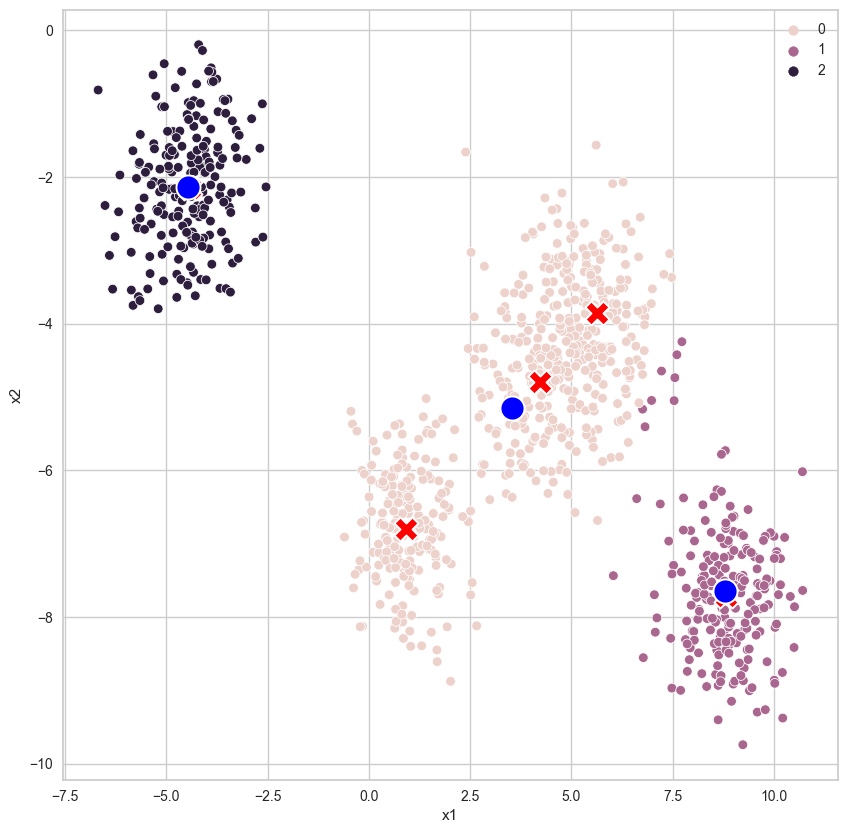

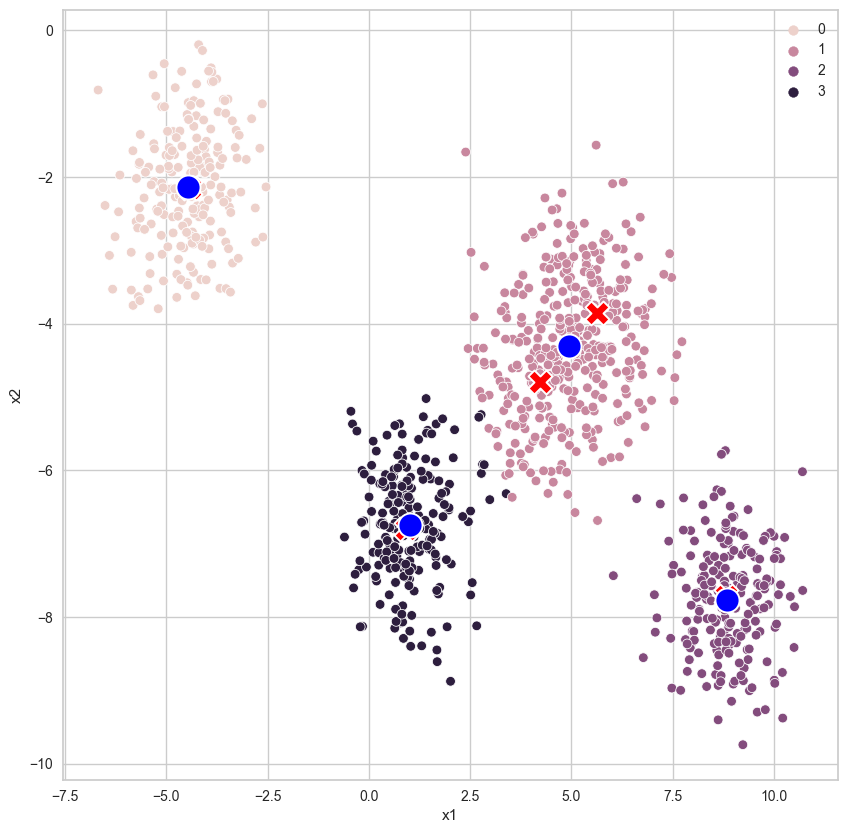

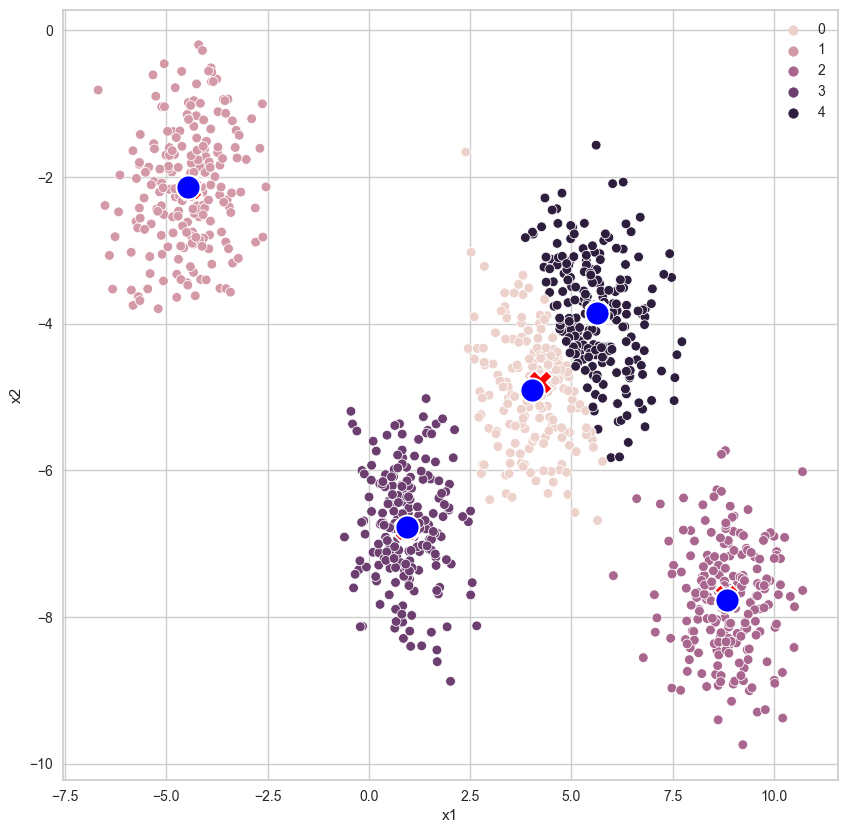

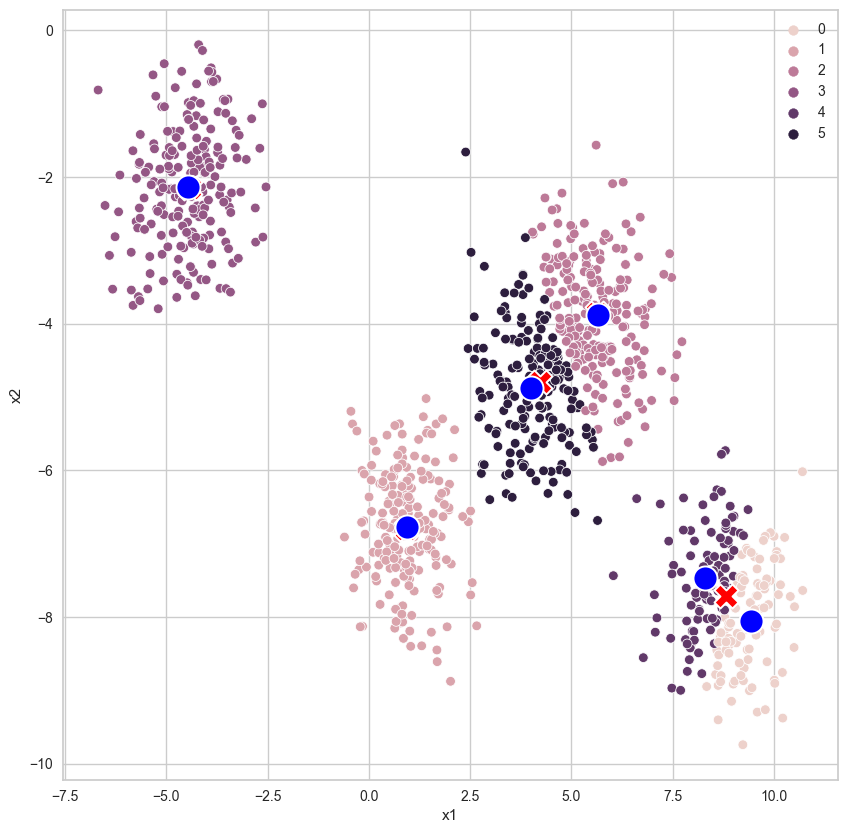

In [10]:
for _ in range(3, 7):
    visualize_clusters(_, x, df_blobs)

## Finding K

In [11]:
sum_sq_distances = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(x)
    sum_sq_distances.append(kmeans.inertia_)

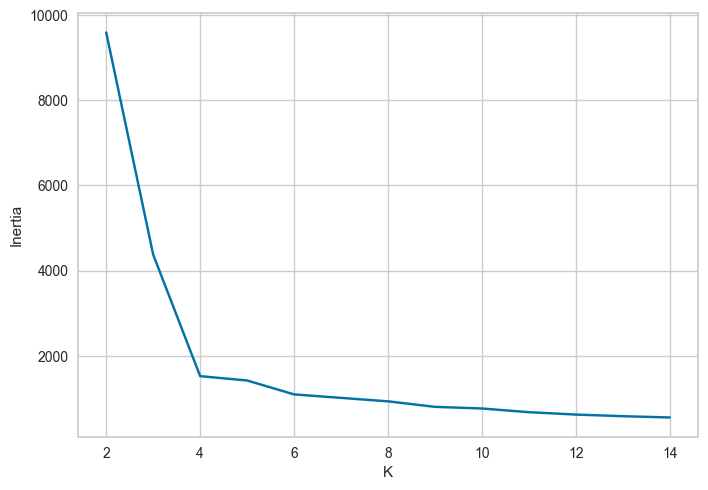

In [12]:
plt.plot(range(2, 15), sum_sq_distances, "bx-")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

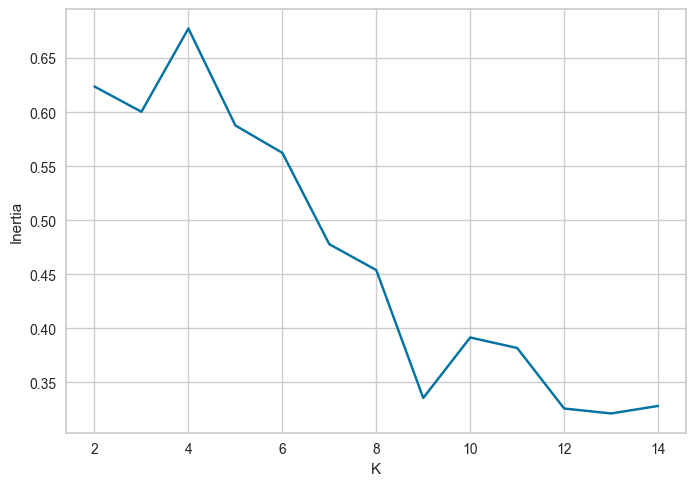

In [14]:
silhouette_scores = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    preds = kmeans.fit_predict(x)
    silhouette_scores.append(silhouette_score(x, preds))

plt.plot(range(2, 15), silhouette_scores, "bx-")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

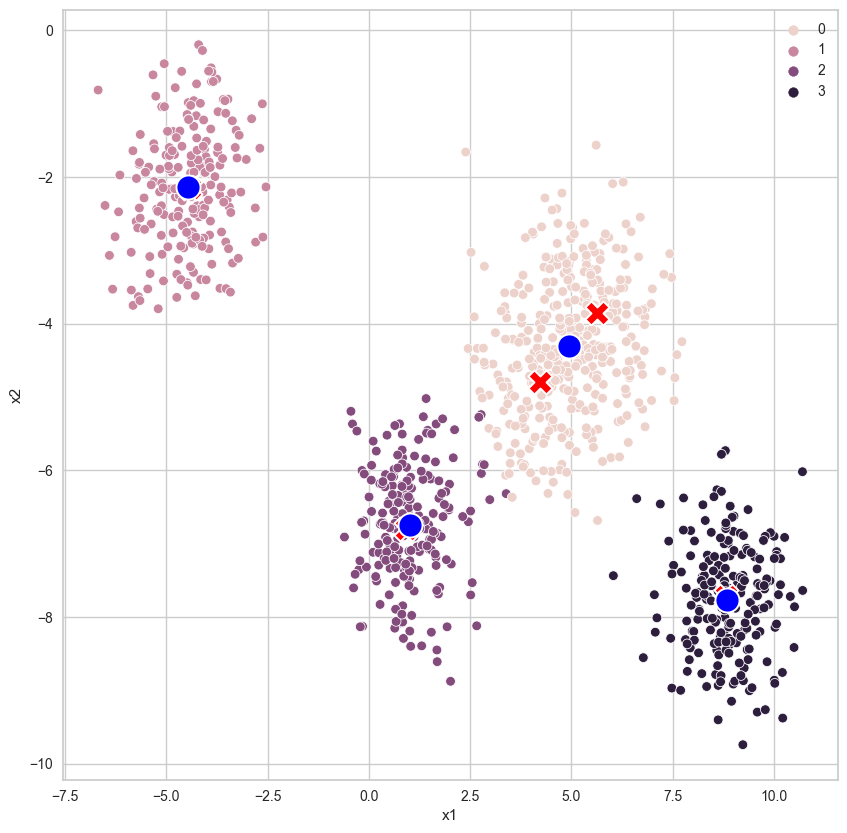

In [16]:
visualize_clusters(4, x, df_blobs)

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

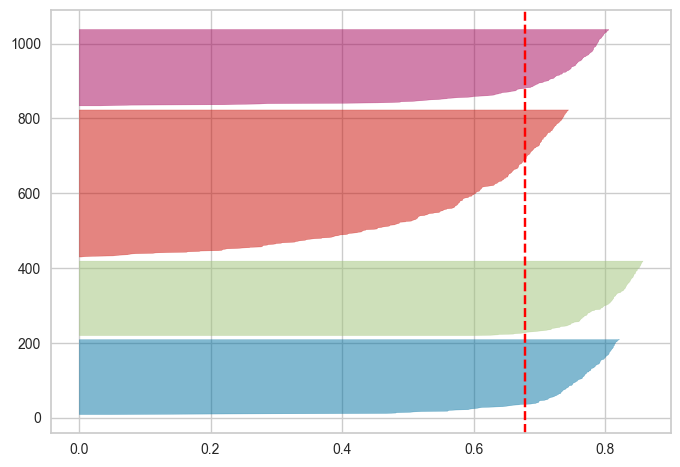

In [18]:
kmeans = KMeans(n_clusters=4)

visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick")
visualizer.fit(x)

In [20]:
from tensorflow import keras
from keras import layers, models, optimizers, losses, metrics

class model(tf.keras.Model):
    def __init__(self, num_classes):
        super(model, self).__init__()
        # Add 3 conv layers, 1 normalization layer, and 2 pooling layers

def train_model(model, train_data, test_data, epochs=10):   

TypeError: DataFrame.__init__() got an unexpected keyword argument 'columns'